# Video Games Sales Prediction
![Gaming3.jpg](Gaming3.jpg)
## <a id='intro'>1. Intoduction</a>
### Problem Definition

>Video games have become immensely popular over the past decade, The global games market in 2019 was estimated at $148.8 billion. 
>
>In this article, we will learn how to implement a Machine Learning model that can predict the global sales of a video game depending on certain features such as its genre, critic reviews, and help developers and game designer to make idea which genre is famous and with high sales to make apps with this genre or develop the famous video game which has low sales.




## <a id='2'>2. Libraries and datasets</a>
### <a id='21'>2.1. Import libraries</a>

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### <a id='22'>2.2. Import data</a>

In [96]:
csv=pd.read_csv('vgsales.csv')

## <a id='3'>3. Data description and analysis</a>

**Feature Description** 

This dataset contains a list of video games with sales greater than 100,000 copies.
Fields include:

•	`Rank` - Ranking of overall sales

•	`Name` - The games name

•	`Platform` - Platform of the games release (i.e. PC,PS4, etc.)

•	`Year` - Year of the game's release

•	`Genre` - Genre of the game

•	`Publisher` - Publisher of the game

•	`NA_Sales` - Sales in North America (in millions)

•	`EU_Sales` - Sales in Europe (in millions)

•	`JP_Sales` - Sales in Japan (in millions)

•	`Other_Sales` - Sales in the rest of the world (in millions)

•	`Global_Sales` - Total worldwide sales.


In [97]:
csv.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [98]:
# how many columns and rows in dataframe
csv.shape

(13799, 11)

In [99]:
# are there any missing values?
csv.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [100]:
# are there duplicate values?
len(csv[csv.duplicated()])

0

In [101]:
# standard statistical measures
csv.drop(['Rank','Year'], axis =1).describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  13799.000000  13799.000000  13799.000000  13799.000000  13799.000000
mean       0.312465      0.173463      0.091407      0.057095      0.634590
std        0.885377      0.549448      0.337312      0.205336      1.685947
min        0.000000      0.000000      0.000000      0.000000      0.040000
25%        0.030000      0.000000      0.000000      0.000000      0.100000
50%        0.110000      0.040000      0.000000      0.010000      0.230000
75%        0.290000      0.140000      0.050000      0.040000      0.570000
max       41.490000     29.020000     10.220000     10.570000     82.740000

**`Findings`**

-big dataset

-no missing values

-no duplicate values

-some outliers and skewed distribution 

### <a id='32'>3.2. Data distribution</a>

(0.0, 1600.0)

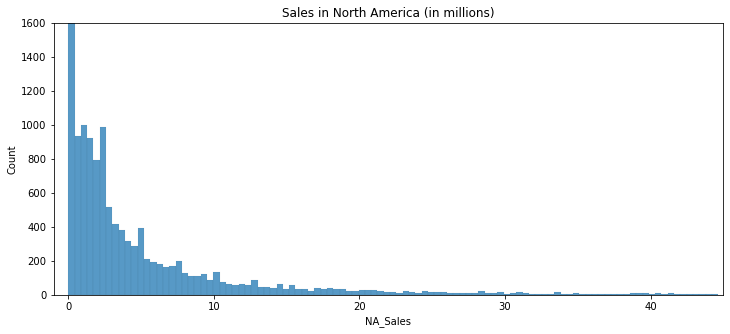

In [135]:
plt.figure(figsize=(12,5))
plt.title("Sales in North America (in millions)")
ax = sns.histplot(csv["NA_Sales"]*20)
ax.set_xlim(-1,45)
ax.set_ylim(0,1600)


(0.0, 1600.0)

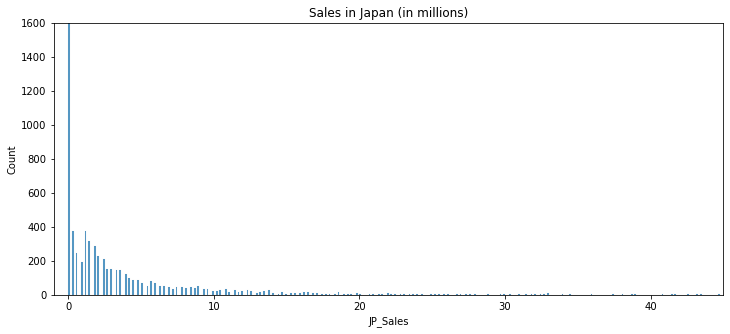

In [136]:
plt.figure(figsize=(12,5))
plt.title("Sales in Japan (in millions)")
ax = sns.histplot(csv["JP_Sales"]*30)
ax.set_xlim(-1,45)
ax.set_ylim(0,1600)

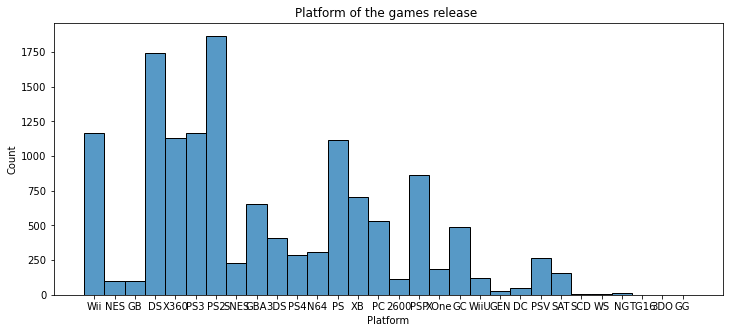

In [103]:
plt.figure(figsize=(12,5))
plt.title("Platform of the games release ")
ax = sns.histplot(csv["Platform"])

**`Findings`**

Looking at the data distribution we can see that there are some features that do indeed have outliers.


## <a id='4'>4. Data evaluation and reduction</a>
### <a id='41'>4.1. Correlation</a>

<AxesSubplot:>

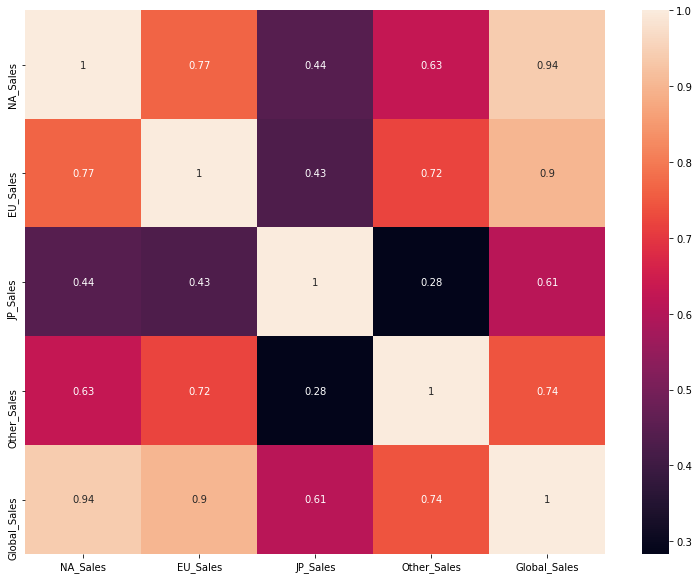

In [105]:
# pearson
plt.figure(figsize=(13,10))
sns.heatmap(csv.drop(['Rank','Year'],axis=1).corr(method='pearson', min_periods=1),annot=True)

<AxesSubplot:>

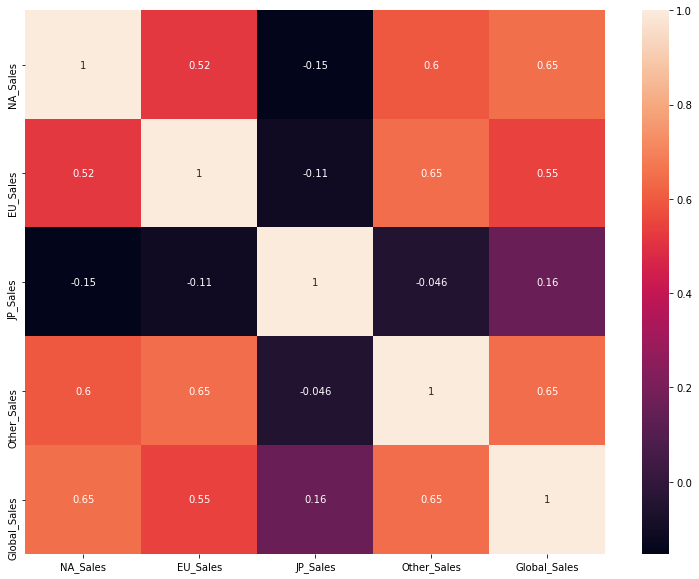

In [106]:
# kendall
plt.figure(figsize=(13,10))
sns.heatmap(csv.drop(['Rank','Year'],axis=1).corr(method='kendall', min_periods=1),annot=True)

<AxesSubplot:>

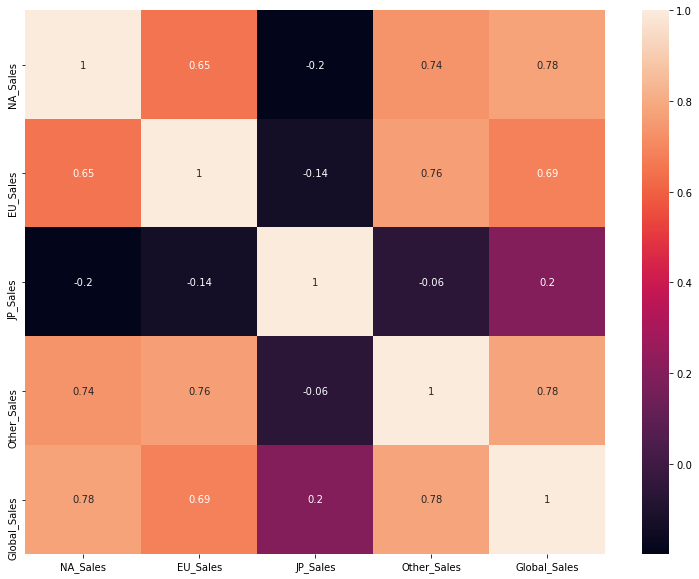

In [107]:
# spearman
plt.figure(figsize=(13,10))
sns.heatmap(csv.drop(['Rank','Year'],axis=1).corr(method='spearman', min_periods=1),annot=True)

**`Findings`**
Are there feature(s) that we could do without due to having high correlation with another feature?

After looking at Pearson correlation, we can see that there are a few features that might be considered for elimination due to high correlation.

•	NA_Sales, due to high correlation with Global_Sales

•	EU_sales, due to high correlation with Other_Sales


### <a id='42'>4.2. Scaling</a>

* the features have incomparable units
* the range values of the features also vary (one for example is 0 to 200, and another 0 to 100,000), so here for example, a change of 50 in one feature is quite significant, whereas in another it is almost unnoticeable
* this level of variance can negatively impact the performance of this model, as this model is based on measuring distances, it can do this by giving more weight to features 
* by scaling we are removing potential bias that the model can have towards features with higher magnitudes

In [108]:
dataset = csv.drop(['Rank','Name','Platform','Year','Genre','Publisher'	], axis =1)
dataset.head()


NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     41.49     29.02      3.77         8.46         82.74
1     29.08      3.58      6.81         0.77         40.24
2     15.85     12.88      3.79         3.31         35.82
3     15.75     11.01      3.28         2.96         33.00
4     11.27      8.89     10.22         1.00         31.37

### `Scale the data: StandardScaler`

In [111]:
columns = dataset.columns
# the scaler to use will be 
scaler = StandardScaler()
# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_standard = scaler.fit_transform(dataset)
rescaled_dataset_standard

array([[46.51015371, 52.50281708, 10.90602039, 40.92412935, 48.70162869],
       [32.49302002,  6.20014835, 19.91878658,  3.47201353, 23.49233707],
       [17.54969377, 23.1268315 , 10.96531491, 15.8424133 , 20.87057074],
       ...,
       [-0.35293064, -0.31571462, -0.15240654, -0.27806828, -0.352687  ],
       [-0.34163561, -0.27931315, -0.27099557, -0.27806828, -0.352687  ],
       [-0.31904555, -0.31571462, -0.27099557, -0.27806828, -0.352687  ]])

### `Scaled dataframes`

In [112]:
df_standard = pd.DataFrame(data= rescaled_dataset_standard , columns = columns)
df_standard

NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales
0      46.510154  52.502817  10.906020    40.924129     48.701629
1      32.493020   6.200148  19.918787     3.472014     23.492337
2      17.549694  23.126831  10.965315    15.842413     20.870571
3      17.436743  19.723294   9.453305    14.137831     19.197860
4      12.376569  15.864738  30.028501     4.592168     18.231010
...          ...        ...        ...          ...           ...
13794  -0.352931  -0.315715  -0.152407    -0.278068     -0.352687
13795  -0.352931  -0.261112  -0.270996    -0.229366     -0.352687
13796  -0.352931  -0.315715  -0.152407    -0.278068     -0.352687
13797  -0.341636  -0.279313  -0.270996    -0.278068     -0.352687
13798  -0.319046  -0.315715  -0.270996    -0.278068     -0.352687

[13799 rows x 5 columns]

#### `Evaluation of scaling techniques`

Text(0, 0.5, 'JP_Sales')

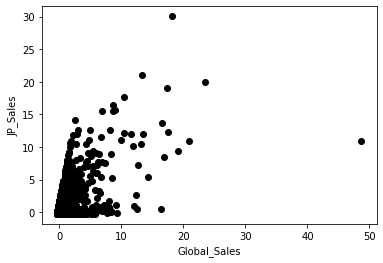

In [113]:
plt.scatter(df_standard['Global_Sales'], df_standard['JP_Sales'],color = 'black')
plt.scatter

plt.xlabel('Global_Sales')
plt.ylabel('JP_Sales')

Text(0, 0.5, 'EU_Sales')

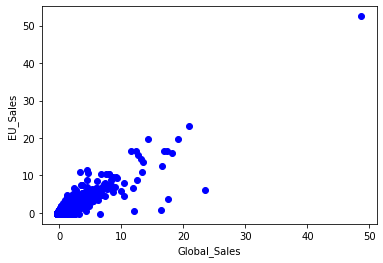

In [114]:
plt.scatter(df_standard['Global_Sales'], df_standard['EU_Sales'],color = 'blue')
plt.scatter

plt.xlabel('Global_Sales')
plt.ylabel('EU_Sales')

Text(0, 0.5, 'NA_Sales')

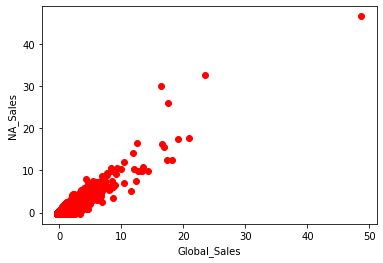

In [115]:
plt.scatter(df_standard['Global_Sales'], df_standard['NA_Sales'],color = 'red')
plt.scatter

plt.xlabel('Global_Sales')
plt.ylabel('NA_Sales')

### <a id='423'>4.3. PCA: Principal Component Analysis</a>

#### PCA with data scaled with StandardScaler

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']


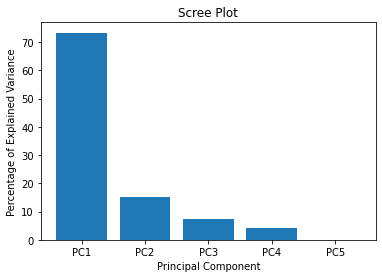

Distribution of the original data =  95.7


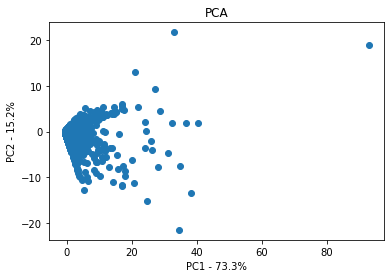

In [116]:
# import PCA 
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_standard)
pca_data_standard = pca.transform(df_standard)
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
print(labels)
# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
# plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
plt.scatter(pca_df_standard.PC1, pca_df_standard.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
print("Distribution of the original data = ", per_var[0]+per_var[1]+per_var[2])


In [117]:
# dataframe with PC1, PC2, P3
data2 = pca_df_standard.drop(['PC4','PC5'], axis = 1)
data2

PC1        PC2        PC3
0      93.040403  18.941261  -6.303043
1      38.349533 -13.410885 -15.423277
2      40.340861   1.776162  -0.642383
3      36.594658   1.827674  -1.790287
4      34.414681 -21.435865   0.893781
...          ...        ...        ...
13794  -0.666370  -0.054449   0.043226
13795  -0.657702   0.080635   0.040021
13796  -0.666370  -0.054449   0.043226
13797  -0.681523   0.057298  -0.000926
13798  -0.688213   0.052579  -0.012620

[13799 rows x 3 columns]

**`Findings`**

After doing PCA with standardised version of the original dataset, we can see that there are 3 principal components can explain about 95% of the distribution of the original data.

## <a id='5'>5. Model: K-Means Clustering</a>

### <a id='51'>5.1. Model set up</a>

`We will use K-means algorithm in this project and put k=3 then we used fit_predict which Compute cluster centers and predict cluster index for each sample.`

In [118]:
km = KMeans (
    n_clusters = 3,
    init = 'random', 
    max_iter = 300, 
    random_state = 0 
)

#### `Run model on the dataset`

In [119]:
y_predicted_data2 = km.fit_predict( data2) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_data2

array([2, 2, 2, ..., 0, 0, 0])

In [120]:
dataset['cluster'] = y_predicted_data2
dataset.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  cluster
0     41.49     29.02      3.77         8.46         82.74        2
1     29.08      3.58      6.81         0.77         40.24        2
2     15.85     12.88      3.79         3.31         35.82        2
3     15.75     11.01      3.28         2.96         33.00        2
4     11.27      8.89     10.22         1.00         31.37        2

### <a id='52'>5.2. Optimal number of clusters: Elbow Method</a>

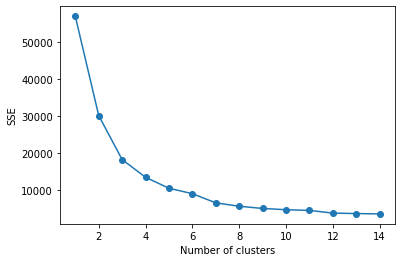

In [121]:
sse = []
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, init='random',max_iter=300, random_state=0
    )
    km.fit(dataset)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

**`Findings`**

After running the kmeans model with the a normalised dataset, a standardised dataset, and a PCA with 3 components (with standardised scaling) we can see that the optimal number of clusters is still 3 with different levels of inertia. Two clusters could also be considered.

## <a id='6'>6. Cluster analysis</a>

### <a id='61'>6.1. Cluster characteristics</a>

` Finally we will add column cluster to the original data and the output will be:`

In [122]:
csv['cluster'] = y_predicted_data2.tolist()
csv
#csv.iloc[80, :].values

Rank                            Name Platform  Year         Genre  \
0          1                      Wii Sports      Wii  2006        Sports   
1          2               Super Mario Bros.      NES  1985      Platform   
2          3                  Mario Kart Wii      Wii  2008        Racing   
3          4               Wii Sports Resort      Wii  2009        Sports   
4          5        Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...      ...                             ...      ...   ...           ...   
13794  14040                  Mahjong Taikai       DS  2004          Misc   
13795  14041        Tomb Raider: Anniversary       PC  2007        Action   
13796  14042        Espgaluda II Black Label     X360  2010       Shooter   
13797  14043  The Croods: Prehistoric Party!      3DS  2013          Misc   
13798  14044                      Bratz Kidz       DS  2008          Misc   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0               Nintendo     41.49     29.02      3.77         8.46   
1               Nintendo     29.08      3.58      6.81         0.77   
2               Nintendo     15.85     12.88      3.79         3.31   
3               Nintendo     15.75     11.01      3.28         2.96   
4               Nintendo     11.27      8.89     10.22         1.00   
...                  ...       ...       ...       ...          ...   
13794         Tecmo Koei      0.00      0.00      0.04         0.00   
13795  Eidos Interactive      0.00      0.03      0.00         0.01   
13796               Cave      0.00      0.00      0.04         0.00   
13797        D3Publisher      0.01      0.02      0.00         0.00   
13798       Game Factory      0.03      0.00      0.00         0.00   

       Global_Sales  cluster  
0             82.74        2  
1             40.24        2  
2             35.82        2  
3             33.00        2  
4             31.37        2  
...             ...      ...  
13794          0.04        0  
13795          0.04        0  
13796          0.04        0  
13797          0.04        0  
13798          0.04        0  

[13799 rows x 12 columns]

In [123]:
# table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(csv.drop(['Rank','Year'],axis=1),index=['cluster'])
clusters_table

EU_Sales  Global_Sales  JP_Sales   NA_Sales  Other_Sales
cluster                                                          
0        0.103032      0.405820  0.061605   0.207144     0.033868
1        1.458047      4.658626  0.586890   2.138481     0.475371
2        6.461714     23.405714  3.511714  11.215714     2.215714

`From this table we conclude that :-`

we find that :

-cluster 0 includes the video games with low sales over the world

-cluster 1 includes the video games with medium sales over world 

-cluster 2 includes the video games with high sales over world and good platforms of this vedio games


### <a id='62'>6.2. Cluster descriptions</a>

In [124]:
# cluster 0 
cluster_0 = csv[csv['cluster'] == 0]
cluster_0.Name.unique()

array(['Star Wars Episode I Racer', 'NBA 2K13', 'Wave Race 64', ...,
       'Super Robot Taisen: Scramble Commander the 2nd', 'Mahjong Taikai',
       'Espgaluda II Black Label'], dtype=object)

In [125]:
# cluster 2
cluster_0 = csv[csv['cluster'] == 2]
cluster_0.Name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
       'Duck Hunt', 'Nintendogs', 'Mario Kart DS',
       'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus',
       'Kinect Adventures!', 'Grand Theft Auto V',
       'Grand Theft Auto: San Andreas', 'Super Mario World',
       'Brain Age: Train Your Brain in Minutes a Day',
       'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land',
       'Super Mario Bros. 3', 'Grand Theft Auto: Vice City',
       'Pokemon Ruby/Pokemon Sapphire', 'Pokemon Black/Pokemon White',
       'Brain Age 2: More Training in Minutes a Day',
       'Gran Turismo 3: A-Spec',
       'Pokémon Yellow: Special Pikachu Edition', 'Pokemon X/Pokemon Y',
       'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops II',
       'Animal Crossing: Wild World', 'Gran Turismo 4'], dtype=object)

In [126]:
#Genres where great games sell best
cluster_0 = csv[csv['cluster'] == 2]
cluster_0.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action'], dtype=object)

## <a id='7'>7. Hierarchical Clustering Algorithm</a>

In [132]:
from sklearn.cluster import AgglomerativeClustering
data = csv.iloc[:, 7:11].values
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y2=cluster.fit_predict(data)
y2


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [133]:
csv['cluster'] = y2.tolist()
csv
# csv.iloc[80, :].values

Rank                            Name Platform  Year         Genre  \
0          1                      Wii Sports      Wii  2006        Sports   
1          2               Super Mario Bros.      NES  1985      Platform   
2          3                  Mario Kart Wii      Wii  2008        Racing   
3          4               Wii Sports Resort      Wii  2009        Sports   
4          5        Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...      ...                             ...      ...   ...           ...   
13794  14040                  Mahjong Taikai       DS  2004          Misc   
13795  14041        Tomb Raider: Anniversary       PC  2007        Action   
13796  14042        Espgaluda II Black Label     X360  2010       Shooter   
13797  14043  The Croods: Prehistoric Party!      3DS  2013          Misc   
13798  14044                      Bratz Kidz       DS  2008          Misc   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0               Nintendo     41.49     29.02      3.77         8.46   
1               Nintendo     29.08      3.58      6.81         0.77   
2               Nintendo     15.85     12.88      3.79         3.31   
3               Nintendo     15.75     11.01      3.28         2.96   
4               Nintendo     11.27      8.89     10.22         1.00   
...                  ...       ...       ...       ...          ...   
13794         Tecmo Koei      0.00      0.00      0.04         0.00   
13795  Eidos Interactive      0.00      0.03      0.00         0.01   
13796               Cave      0.00      0.00      0.04         0.00   
13797        D3Publisher      0.01      0.02      0.00         0.00   
13798       Game Factory      0.03      0.00      0.00         0.00   

       Global_Sales  cluster  
0             82.74        1  
1             40.24        1  
2             35.82        1  
3             33.00        1  
4             31.37        1  
...             ...      ...  
13794          0.04        0  
13795          0.04        0  
13796          0.04        0  
13797          0.04        0  
13798          0.04        0  

[13799 rows x 12 columns]

In [134]:
clusters_table = pd.pivot_table(csv.drop(['Rank','Year'],axis=1),index=['cluster'])
clusters_table

EU_Sales  Global_Sales  JP_Sales   NA_Sales  Other_Sales
cluster                                                          
0        0.115728      0.450960  0.068625   0.226722     0.039719
1        8.811111     30.490556  3.958889  15.345000     2.374444
2        2.020982      6.383095  0.795833   2.938155     0.628274

`From this table we conclude that :-`

we find that :

-cluster 0 includes the video games with low sales over the world

-cluster 2 includes the video games with medium sales over world 

-cluster 1 includes the video games with high sales over world and good platforms of this vedio games